# Setup

In [1]:
import json

import numpy as np
import palettable

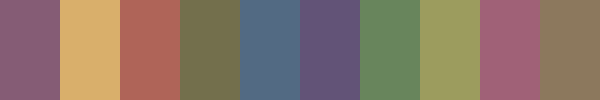

In [2]:
color_scheme = palettable.cartocolors.qualitative.Antique_10
colors = (np.array(color_scheme.mpl_colors) * 255).astype(int)
colors = np.hstack([colors, np.full((colors.shape[0], 1), 255)])
color_scheme.show_discrete_image()

# Create a test scene

In [3]:
scene_fp = "./test_data/test_scene.json"

In [4]:
scene_data = {}

In [5]:
scene_data["player"] = {
    "components": {
        "PhysicsComp": {
            "mass": 1.0,
            "pos": [1.0, 1.0],
            "vel": [2.0, 2.0],
        },
        "DragForceComp": {"drag_coefficient": 0.05, "drag_power": 2.5},
        "DurabilityComp": {"delete_at_zero": False},
        "CircleComp": {"radius": 1.0, "fill_color": [255, 128, 128, 255]},
        "StopWatchComp": {},
    }
}

In [6]:
scene_data["beacon"] = {
    "components": {
        "PhysicsComp": {},
        "MouseButtonReleasedComp": {},
        "CircleComp": {
            "radius": 0.5,
            "outline_thickness": 0.1,
            "fill_color": [0, 0, 0, 255],
            "outline_color": [255, 255, 255, 255],
            "zorder": 1,
        },
    }
}

In [7]:
scene_data["player-beacon force"] = {
    "components": {
        "PairComp": {"target_entity": "player", "source_entity": "beacon"},
        "PairwiseForceComp": {"magnitude": -1.0},
    }
}

In [8]:
n_enemies = 10
rng = np.random.default_rng()
xs = rng.uniform(-100, 100, n_enemies)
ys = rng.uniform(-120, -20, n_enemies)
for i in range(n_enemies):
    # Enemies themselves
    scene_data[f"enemy.{i:03d}"] = {
        "components": {
            "EnemyFlag": {},
            "PhysicsComp": {
                "pos": [xs[i], ys[i]],
                "vel": [0.0, 0.0],
            },
            "DragForceComp": {},
            "DurabilityComp": {},
            "CircleComp": {
                "radius": 1.0,
                "fill_color": colors[3].tolist(),
            },
        }
    }

    # Relationships between enemies and player
    scene_data[f"player-enemy.{i:03d} inverse square"] = {
        "components": {
            "PairComp": {"source_entity": "player", "target_entity": f"enemy.{i:03d}"},
            "PairwiseForceComp": {
                "magnitude": -1.0,
                "power": -2.0,
                "softening": 1.0,
                "distance_scaling": 10.0,
            },
        }
    }
    scene_data[f"player-enemy.{i:03d} spring"] = {
        "components": {
            "PairComp": {"source_entity": "player", "target_entity": f"enemy.{i:03d}"},
            "PairwiseForceComp": {
                "magnitude": -0.05,
            },
        }
    }
    scene_data[f"player-enemy.{i:03d} collision"] = {
        "components": {
            "PairComp": {"source_entity": "player", "target_entity": f"enemy.{i:03d}"},
            "CollisionComp": {},
        }
    }

In [9]:
# Enemy-enemy collisions
for i in range(n_enemies):
    for j in range(n_enemies):
        if i >= j:
            continue
        scene_data[f"enemy.{i:03d}-enemy.{j:03d} collision"] = {
            "components": {
                "PairComp": {
                    "source_entity": f"enemy.{i:03d}",
                    "target_entity": f"enemy.{j:03d}",
                },
                "CollisionComp": {},
            }
        }

In [10]:
n_bkgrd = 100
for i in range(n_bkgrd):
    scene_data[f"bkgrd.{i:03d}"] = {
        "components": {
            "PhysicsComp": {},
            "CircleComp": {
                "radius": 10.0 * i,
                "outline_thickness": 0.2,
                "fill_color": [127, 127, 127, 255],
                "outline_color": [63, 63, 63, 255],
                "zorder": -i,
            },
        }
    }

In [11]:
with open(scene_fp, "w") as json_file:
    json.dump(scene_data, json_file, indent=4)